<a href="https://colab.research.google.com/github/Viraj494/lung-cancer-prediction/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Read the dataset
df = pd.read_csv('survey lung cancer.csv')

# Display the first few rows of the dataset
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Label encoding for binary columns ('GENDER' and 'LUNG_CANCER')
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])  # M=1, F=0
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])  # YES=1, NO=0

# Checking for missing values
print(df.isnull().sum())  # If there are missing values, you can handle them

# Separating the features and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Scaling the features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [5]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Input layer with 16 neurons
    keras.layers.Dense(8, activation='relu'),  # Hidden layer with 8 neurons
    keras.layers.Dropout(0.2),  # Adding dropout to avoid overfitting
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6528 - loss: 0.5949 - val_accuracy: 0.9032 - val_loss: 0.5483
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5547 - val_accuracy: 0.9516 - val_loss: 0.4870
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.5254 - val_accuracy: 0.9677 - val_loss: 0.4335
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4788 - val_accuracy: 0.9677 - val_loss: 0.3934
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.4427 - val_accuracy: 0.9677 - val_loss: 0.3559
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.4261 - val_accuracy: 0.9677 - val_loss: 0.3268
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8583 - loss: 0.4161 - val_accuracy: 0.9677 - val_loss: 0.3018
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8631 - loss: 0.3918 - val_accuracy: 0.9677 - val_loss

2/2 - 0s - 34ms/step - accuracy: 0.9355 - loss: 0.1008

Test Accuracy: 0.9354838728904724
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



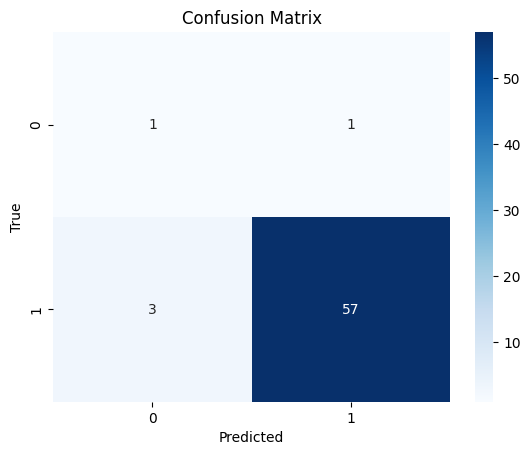

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

# Predict the test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


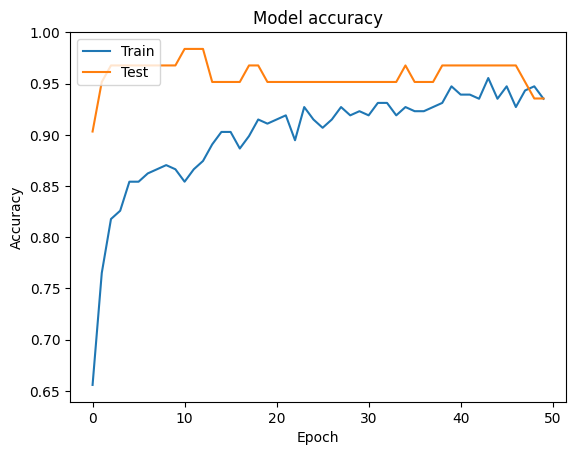

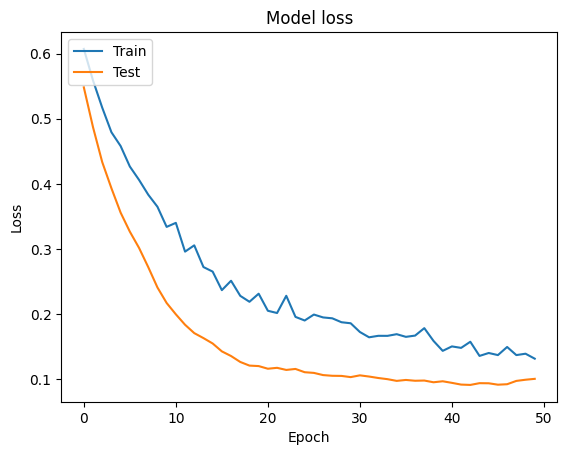

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
# Save the trained model
model.save('lung_cancer_prediction_model.h5')

# Load the model
loaded_model = keras.models.load_model('lung_cancer_prediction_model.h5')


In [10]:
# Let's take the first sample from the test set and make a prediction
sample_data = X_test[0].reshape(1, -1)  # Reshaping to match the input format
predicted_value = model.predict(sample_data)

# Output the predicted value
if predicted_value > 0.5:
    print("The model predicts that this person has lung cancer.")
else:
    print("The model predicts that this person does not have lung cancer.")

# Show the actual value from the dataset for comparison
actual_value = y_test.iloc[0]
print(f"Actual value (1 = Has Lung Cancer, 0 = No Lung Cancer): {actual_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The model predicts that this person has lung cancer.
Actual value (1 = Has Lung Cancer, 0 = No Lung Cancer): 1
